### 1. Data preprocessing

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error as mape, root_mean_squared_error as rmse, mean_absolute_error as mae,  mean_squared_error as mse
from sklearn.linear_model import LinearRegression

In [24]:
# Split: [0] = 70% 20% 10% | [1] = 60% 20% 20% | [2] = 80% 10% 10%
split_type = [[0.7,0.2],[0.6,0.2],[0.8,0.1]]
# Stock [0] = FPT | [1] = CMG | [2] = ITD
stock_name = ["FPT", "CMG", "ITD"]

In [25]:
#Change stock and split to adjust between splitting type and stock
stock = 1
split = 1

In [26]:
#Loading data 
df = pd.read_csv(f"../../dataset/{stock_name[stock]}_stock.csv")
df = df[['close']]
df = df.reset_index(drop=True)
df.head()

,close
0,13480
1,13970
2,14460
3,14060
4,13830


In [27]:
#Shape of the dataframe
df.shape

(1252, 1)

In [28]:
#Describe the dataframe
df.describe()

,close
count,1252.000000
mean,25802.539137
std,8986.348803
min,10880.000000
25%,17710.000000
50%,25925.000000
75%,33325.000000
max,44150.000000


In [29]:
#Defining the split size
train_size = int(split_type[split][0] * len(df))
test_size = int(split_type[split][1] * len(df))
val_size = len(df) - train_size - test_size

In [30]:
#splitting data into train, test and validation set
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [31]:
#splitting sets into independent and dependent variable
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])

X_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['close'])

### 2. Model training

In [32]:
# Create a Linear Regression model and fitting it
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [33]:
#Predicting using test set, validation set
y_test_pred = model.predict(X_test)
y_val_pred = model.predict(X_val)

### Forecast 30 days

In [34]:
#Change num of days to change days to forecast
num_of_days = 30
predicted_day = np.array(range(df.index[-1]+1, df.index[-1]+num_of_days+1)).reshape(-1,1)

In [35]:
#Forecasting the stock price for next "num_of_days" days
y_30_days_pred = model.predict(predicted_day)

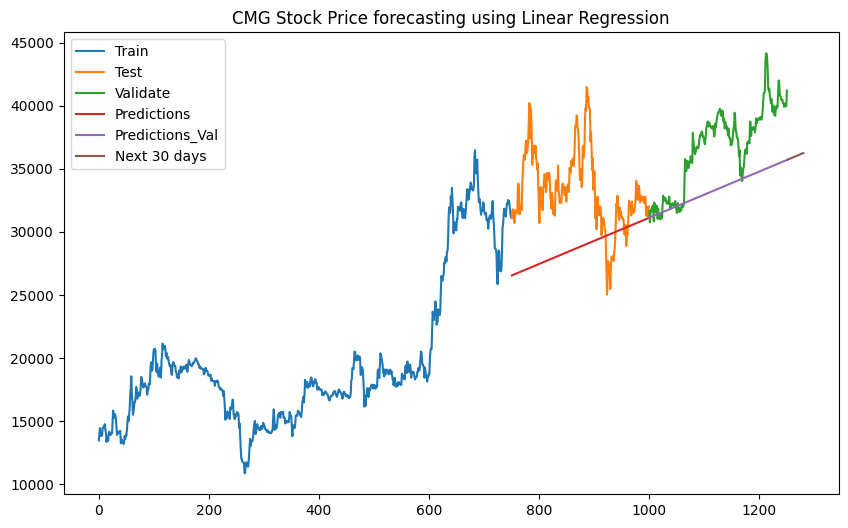

In [36]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(val_data.index, val_data['close'])
plt.plot(test_data.index, y_test_pred)
plt.plot(val_data.index, y_val_pred)
plt.plot(predicted_day, y_30_days_pred)
plt.title(f"{stock_name[stock]} Stock Price forecasting using Linear Regression")
plt.legend(['Train', 'Test', 'Validate','Predictions','Predictions_Val', f"Next {num_of_days} days"])
plt.show()

### Forecast 60 days

In [37]:
#Change num of days to change days to forecast
num_of_days = 60
predicted_day = np.array(range(df.index[-1]+1, df.index[-1]+num_of_days+1)).reshape(-1,1)

In [38]:
#Forecasting the stock price for next "num_of_days" days
y_60_days_pred = model.predict(predicted_day)

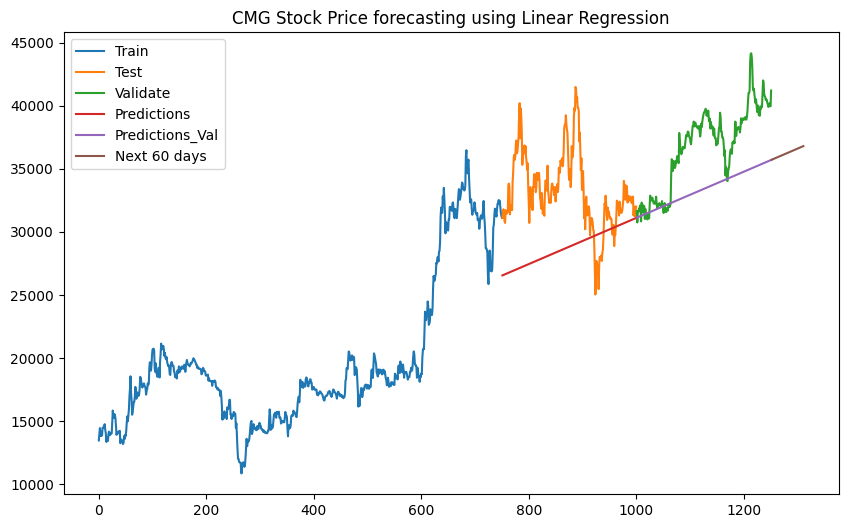

In [39]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(val_data.index, val_data['close'])
plt.plot(test_data.index, y_test_pred)
plt.plot(val_data.index, y_val_pred)
plt.plot(predicted_day, y_60_days_pred)
plt.title(f"{stock_name[stock]} Stock Price forecasting using Linear Regression")
plt.legend(['Train', 'Test', 'Validate','Predictions','Predictions_Val', f"Next {num_of_days} days"])
plt.show()

### Forecast 90 days

In [40]:
#Change num of days to change days to forecast
num_of_days = 90
predicted_day = np.array(range(df.index[-1]+1, df.index[-1]+num_of_days+1)).reshape(-1,1)

In [41]:
#Forecasting the stock price for next "num_of_days" days
y_90_days_pred = model.predict(predicted_day)

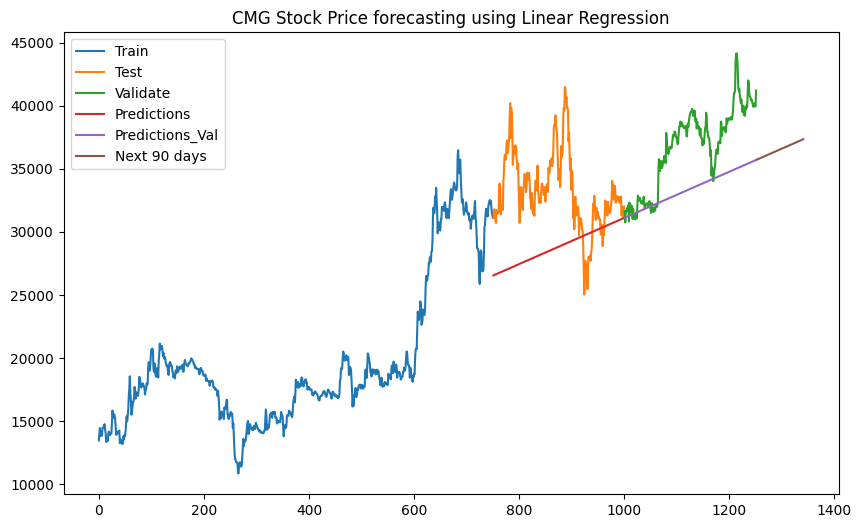

In [42]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(val_data.index, val_data['close'])
plt.plot(test_data.index, y_test_pred)
plt.plot(val_data.index, y_val_pred)
plt.plot(predicted_day, y_90_days_pred)
plt.title(f"{stock_name[stock]} Stock Price forecasting using Linear Regression")
plt.legend(['Train', 'Test', 'Validate','Predictions','Predictions_Val', f"Next {num_of_days} days"])
plt.show()

### 3. Model evaluation

In [43]:
# Model evaluation on test set
print(f"MSE on test data: {mse(y_test, y_test_pred)}")
print(f"MAPE on test data: {mape(y_test, y_test_pred) * 100}%")
print(f"RMSE on test data: {rmse(y_test, y_test_pred)}")
print(f"MAE on test data: {mae(y_test, y_test_pred)}")

MSE on test data: 33366677.357915305
MAPE on test data: 13.882008767197554%
RMSE on test data: 5776.389647341608
MAE on test data: 4815.135384863306


In [44]:
# Model evaluation on validation set
print(f"MSE on validation data: {mse(y_val, y_val_pred)}")
print(f"MAPE on validation data: {mape(y_val, y_val_pred) * 100}%")
print(f"RMSE on validation data: {rmse(y_val, y_val_pred)}")
print(f"MAE on validation data: {mae(y_val, y_val_pred)}")

MSE on validation data: 15533475.753653012
MAPE on validation data: 8.642261876907234%
RMSE on validation data: 3941.253068968423
MAE on validation data: 3326.808925978725
